In [1]:
#import lib


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
#Cluster lib from skLearn

In [4]:
from sklearn.cluster import KMeans

In [5]:
#data loading

In [6]:
data = pd.read_csv('countries_continent.csv')

In [7]:
data.head(5)

,name,Longitude,Latitude,continent
0,Aruba,-69.982677,12.520880,North America
1,Afghanistan,66.004734,33.835231,Asia
2,Angola,17.537368,-12.293361,Africa
3,Anguilla,-63.064989,18.223959,North America
4,Albania,20.049834,41.142450,Europe


In [8]:
#Quick check 

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 4 columns):
name         241 non-null object
Longitude    241 non-null float64
Latitude     241 non-null float64
continent    241 non-null object
dtypes: float64(2), object(2)
memory usage: 7.6+ KB


In [10]:
#mapping data

In [11]:
data.continent.unique()

array(['North America', 'Asia', 'Africa', 'Europe', 'South America',
       'Oceania', 'Antarctica', 'Seven seas (open ocean)'], dtype=object)

In [12]:
data_map = data.copy()

In [13]:
data_map['continent'] = data['continent'].map({'North America':0,
                                              'Asia':1,
                                              'Africa':2,
                                              'Europe':3,
                                              'South America':4,
                                              'Oceania':5,
                                              'Antarctica':6,
                                              'Seven seas (open ocean)':7})

In [14]:
data_map.head(12)

,name,Longitude,Latitude,continent
0,Aruba,-69.982677,12.520880,0
1,Afghanistan,66.004734,33.835231,1
2,Angola,17.537368,-12.293361,2
3,Anguilla,-63.064989,18.223959,0
4,Albania,20.049834,41.142450,3
5,Aland,19.953288,60.214887,3
6,Andorra,1.560544,42.542291,3
7,United Arab Emirates,54.300167,23.905282,1
8,Argentina,-65.179807,-35.381349,4
9,Armenia,44.929933,40.289526,1


In [15]:
#chossing feature ['Longitude']['Latitude']['continent']

In [16]:
x = data_map.iloc[:,1:4]

In [17]:
x.head(5)

,Longitude,Latitude,continent
0,-69.982677,12.520880,0
1,66.004734,33.835231,1
2,17.537368,-12.293361,2
3,-63.064989,18.223959,0
4,20.049834,41.142450,3


In [18]:
#cluster with Sklearn

In [19]:
kmeans = KMeans(6) #not sure how many can be good to use but initial using 6 cluster

In [20]:
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [21]:
#finalizing the result

In [22]:
data_cluster = kmeans.fit_predict(x)

In [23]:
data_cluster

array([0, 1, 3, 0, 2, 2, 2, 1, 0, 1, 5, 3, 4, 3, 0, 4, 2, 1, 3, 2, 2, 2,
       1, 2, 1, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 4, 1, 3, 3, 2, 0, 1, 2, 3,
       3, 3, 5, 0, 3, 2, 0, 0, 0, 0, 2, 2, 2, 2, 3, 0, 2, 0, 2, 0, 2, 3,
       2, 2, 3, 2, 4, 0, 2, 2, 4, 3, 2, 1, 2, 2, 2, 2, 2, 3, 2, 0, 2, 0,
       4, 0, 4, 3, 0, 2, 0, 2, 4, 2, 1, 4, 1, 2, 1, 1, 2, 2, 2, 0, 2, 2,
       4, 1, 1, 3, 1, 4, 0, 0, 4, 2, 1, 1, 2, 2, 2, 0, 2, 1, 3, 2, 2, 2,
       4, 0, 2, 2, 2, 3, 1, 0, 4, 2, 2, 2, 1, 2, 1, 4, 3, 2, 0, 3, 3, 4,
       3, 4, 2, 4, 2, 0, 5, 2, 2, 1, 4, 4, 1, 1, 0, 5, 0, 4, 4, 4, 2, 0,
       4, 2, 0, 2, 5, 1, 2, 1, 3, 2, 1, 3, 3, 2, 4, 0, 3, 4, 2, 0, 2, 3,
       3, 0, 2, 3, 0, 2, 2, 2, 3, 0, 3, 2, 0, 2, 2, 1, 1, 1, 4, 5, 0, 2,
       2, 4, 3, 3, 2, 0, 0, 1, 2, 0, 0, 0, 0, 4, 4, 5, 5, 1, 3, 3, 3])

In [24]:
#adding cluster column to the df

In [25]:
new_data = data_map.copy()

In [26]:
new_data['Cluster'] = data_cluster

In [27]:
new_data.head(10)

,name,Longitude,Latitude,continent,Cluster
0,Aruba,-69.982677,12.520880,0,0
1,Afghanistan,66.004734,33.835231,1,1
2,Angola,17.537368,-12.293361,2,3
3,Anguilla,-63.064989,18.223959,0,0
4,Albania,20.049834,41.142450,3,2
5,Aland,19.953288,60.214887,3,2
6,Andorra,1.560544,42.542291,3,2
7,United Arab Emirates,54.300167,23.905282,1,1
8,Argentina,-65.179807,-35.381349,4,0
9,Armenia,44.929933,40.289526,1,1


In [28]:
#plotting initial cluster

In [29]:
x_axis = new_data['Longitude']
y_axis = new_data['Latitude']
c_scheme = new_data['Cluster']

<function matplotlib.pyplot.show(*args, **kw)>

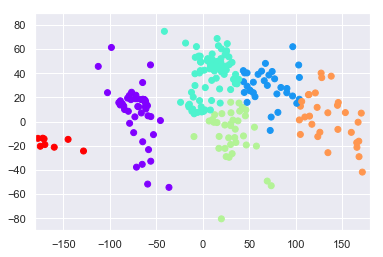

In [30]:
plt.scatter(x_axis,y_axis,c=c_scheme,cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show

In [31]:
#time to find out best choice for selecting number of cluster
#using inertia_ from sklearn
kmeans.inertia_

152090.08723538424

In [32]:
#wcss = within cluster sum of squares

In [33]:
wcss = []
clus_num = 10 #lets give it a number based on the maximum cluster i want to see. 
for i in range(1,clus_num):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss_result = kmeans.inertia_
    wcss.append(wcss_result)

In [34]:
wcss

[1414582.2109547593,
 657709.2003208959,
 325921.88351033407,
 257283.07172616705,
 192806.46530297387,
 152797.03607372672,
 127832.83255974439,
 103276.45627908774,
 85254.05483643065]

In [35]:
#The elbow method

Text(0,0.5,'Within-cluster SUm of Squares')

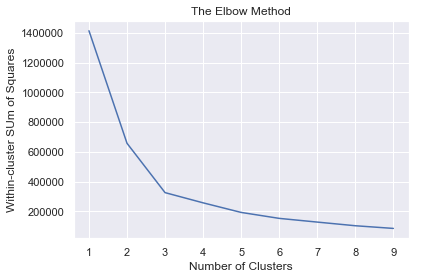

In [36]:
cluster_number = range(1,clus_num)
plt.plot(cluster_number,wcss)#x,y
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-cluster SUm of Squares')

In [37]:
#no 2 will be sub optimal
#no 3 will be best for the result

In [38]:
kmeans = KMeans(2)
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [39]:
#predict

In [40]:
cluster_2 = kmeans.fit_predict(x)

In [41]:
data2 = data_map.copy()
data2['Cluster'] = cluster_2

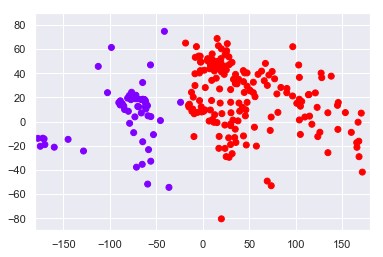

In [42]:
plt.scatter(x_axis,y_axis,c=data2['Cluster'],cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

In [43]:
#for no 3

In [44]:
kmeans = KMeans(3)
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [45]:
#predict

In [46]:
cluster_3 = kmeans.fit_predict(x)

In [47]:
data3 = data_map.copy()
data3['Cluster'] = cluster_3

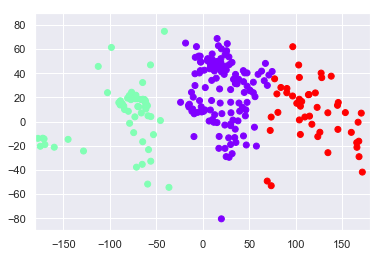

In [48]:
plt.scatter(x_axis,y_axis,c=data3['Cluster'],cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()